<ipython-input-8-143be5a7f337>:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df["mes"], rotation=90)  # Rotación de las etiquetas
<ipython-input-8-143be5a7f337>:177: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1d.set_xticklabels(df["mes"], rotation=90)


Text(0, 0.5, '')

findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font f

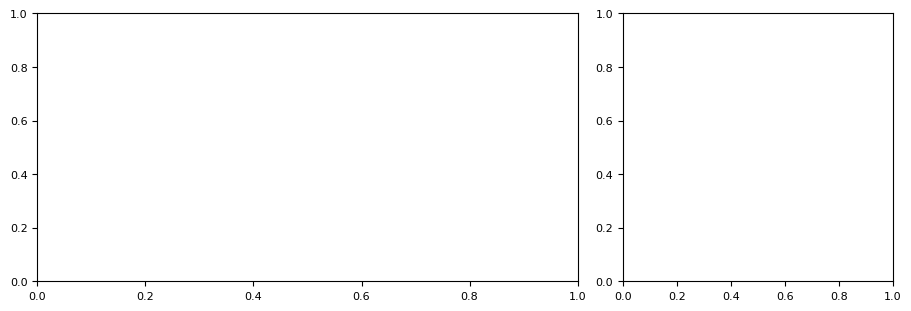

findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font f

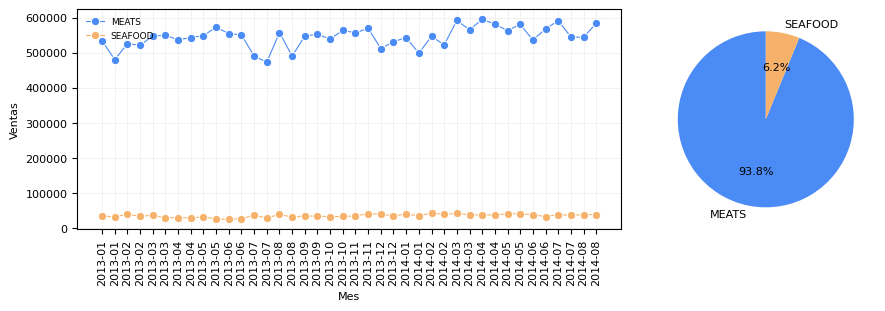

findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font family 'nabla' not found.
findfont: Font f

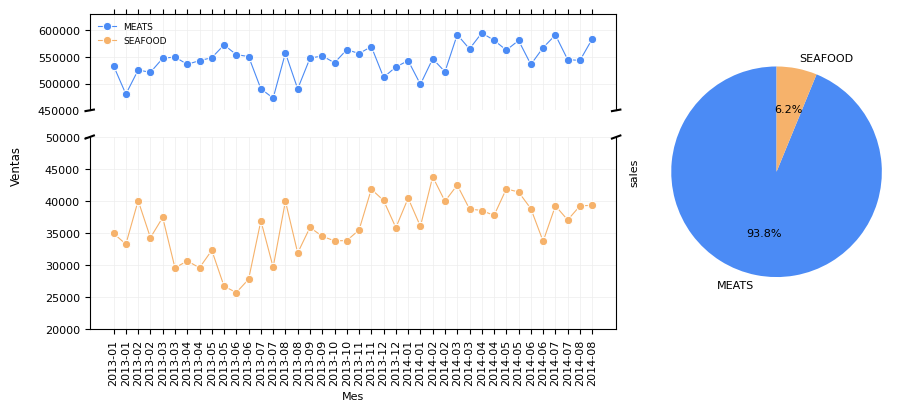

In [8]:
import matplotlib.font_manager as font_manager
import matplotlib

# Esta sentencia va a cargar todas las fuentes que tenemos instaladas en nuestra computadora
# Asegúrense de cambiar el PATH por el suyo. Este path será similar para usuarios de MacOS.
# En Windows lo más probable es que sea: 'C:\Windows\Fonts', pero podría cambiar.
for font in font_manager.findSystemFonts("/Users/alfon/AppData/Local/Microsoft/Windows/Fonts/"):
    font_manager.fontManager.addfont(font)

# Esto va a mostrar por pantalla todas las fuentes disponibles
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

# Configuramos la fuente de manera global para todos los gráficos con un tamaño por defecto
matplotlib.rc("font", family="nabla", size=5)

# Los gráficos que hagamos a partir de aquí, utilizarán esta fuente
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../../data/tienda_ventas.csv")
df = df[df["family"].isin(["SEAFOOD", "MEATS"])]
df["mes"] = df["date"].apply(lambda x: x[:7])

# Dataframe para el gráfico de lineas
df = df.groupby(["mes", "family"]).agg({"sales": "sum"}).reset_index()

# Dataframe para el pie chart
df_pie = df.groupby("family").agg({"sales": "sum"})
df_pie

# Si utilizamos Seaborn, podemos definir colores con un diccionario y las categorías que queremos que tenga cada color
colors = {"MEATS": "#4b8bf5", "SEAFOOD": "#f6b26b"}

# Cuando utilicemos Pandas o Matplotlib tendremos que crear un ListedColorMap a partir de una lista de colores
# Aquí estamos cogiendo los valores de nuestro diccionario de colores como una lista ['#4b8bf5', '#f6b26b']
from matplotlib.colors import ListedColormap

cmap = ListedColormap(colors.values())

# Este ColorMap lo podemos utilizar para cualquier gráfico que hagamos en Pandas o Matplotlib
font = {"size": 8}
matplotlib.rc(
    "font", **font
)  # Esta es otra forma de configurar globalmente el tamaño de la fuente
# Podemos crear subplots que no tengan el mismo tamaño
fig, (ax1, ax2) = plt.subplots(
    1,
    2,
    constrained_layout=True,
    gridspec_kw={
        # Esto lo hacemos definiendo la relación entre los tamaños.
        # En este caso el primer subplot sera 2 veces el tamaño del segundo (2:1)
        "width_ratios": [2, 1]
    },
)
fig.set_size_inches(9, 3)

# Volvemos a repetir la creación de los subplots en esta nueva celda
fig, (ax1, ax2) = plt.subplots(
    1, 2, constrained_layout=True, gridspec_kw={"width_ratios": [2, 1]}
)
fig.set_size_inches(9, 3)

# Gráfico de Lineas
# Para los colores del gráfico de lineas en Seaborn utilizamos el diccionario de colores que creamos
sns.lineplot(
    data=df,
    x="mes",
    y="sales",
    hue="family",
    ax=ax1,
    linewidth=0.8,
    marker="o",
    palette=colors,  # Aquí
)

# Pie Chart
# Para los colores del PieChart en Pandas utilizamos el ColorMap que creamos
df_pie.plot.pie(
    y="sales",
    startangle=90,
    autopct="%1.1f%%",
    ax=ax2,
    legend=False,
    colormap=cmap,  # Aquí
)

# Configuramos un poco el grid
ax1.xaxis.grid(linewidth=0.5, color="#ededed")
ax1.yaxis.grid(linewidth=0.5, color="#ededed")
ax1.set_axisbelow(True)

# Posicionamos la leyenda
ax1.legend(
    loc="upper left",
    prop={"size": 6.5},  # Otra forma de definir el tamaño de la fuente en la leyenda
    frameon=False,  # Podemos quitarle el marco a la leyenda
    bbox_to_anchor=(0, 1),
)

# Colocamos las etiquetas
ax1.set_ylabel("Ventas")
ax1.set_xlabel("Mes")
# Rotamos los ticks del eje X
ax1.set_xticklabels(df["mes"], rotation=90)  # Rotación de las etiquetas

# Quitamos el Y label del PieChart
ax2.set_ylabel("")

# Ahora tenemos ax1u, ax1d, y axpie
# Repetimos todos los pasos

fig, ((ax1u, pie1), (ax1d, pie2)) = plt.subplots(
    2,
    2,
    constrained_layout=True,
    gridspec_kw={"height_ratios": [1, 2], "width_ratios": [2, 1]},
)
fig.set_size_inches(9, 4)
gs = ax1u.get_gridspec()
pie1.remove()
pie2.remove()
axpie = fig.add_subplot(gs[:, 1])

# ======= Repetimos construccion de LinePlot con eje quebrado =======
sns.lineplot(
    data=df,
    x="mes",
    y="sales",
    hue="family",
    ax=ax1u,
    linewidth=0.8,
    marker="o",
    palette=colors,
)
sns.lineplot(
    data=df,
    x="mes",
    y="sales",
    hue="family",
    ax=ax1d,
    linewidth=0.8,
    marker="o",
    palette=colors,
)

# Ejes quebrados
ax1u.set_ylim(450000, 630000)  # Rango de meats
ax1d.set_ylim(20000, 50000)  # Rango de seafood
ax1u.xaxis.tick_top()
ax1u.spines["bottom"].set_visible(False)
ax1u.tick_params(labeltop=False)
ax1d.spines["top"].set_visible(False)
ax1d.xaxis.tick_bottom()

# ======= MAGIA ========
d = 0.008
kwargs = dict(transform=ax1u.transAxes, color="k", clip_on=False)
ax1u.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
ax1u.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax1d.transAxes)  # switch to the bottom axes
ax1d.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax1d.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
# === FIN DE LA MAGIA ===

ax1u.set_xlabel("")
ax1u.set_ylabel("")
ax1u.xaxis.grid(linewidth=0.5, color="#ededed")
ax1u.yaxis.grid(linewidth=0.5, color="#ededed")
ax1u.set_axisbelow(True)
ax1d.xaxis.grid(linewidth=0.5, color="#ededed")
ax1d.yaxis.grid(linewidth=0.5, color="#ededed")
ax1d.set_axisbelow(True)
ax1d.set_xlabel("Mes")
ax1d.set_ylabel("")
ax1d.set_xticklabels(df["mes"], rotation=90)
ax1u.legend(loc="upper left", prop={"size": 6.5}, frameon=False, bbox_to_anchor=(0, 1))
ax1d.legend().remove()
fig.supylabel(
    "Ventas",
    verticalalignment="center",
    horizontalalignment="center",
    y=0.6,  # La ajustamos un poco debido a que el espacio entre los ejes quebrados la mueve ligeramente. 
    # Esta Y es un porcentaje, parecido a bbox_to_anchor
    fontsize=8.5,
)
# ======= Fin de construcción de LinePlot con eje quebrado =======


# ======= Repetimos construcción de PieChart =======
df_pie.plot.pie(
    y="sales",
    startangle=90,
    autopct="%1.1f%%",
    ax=axpie,
    legend=False,
    colormap=cmap,  # Aqui
)
ax2.set_ylabel("")